In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import scipy.io
import os
from util import *
import lspn

In [8]:
def get_global_index( domain, numCoeffs, voxel_i, voxel_j, coeff ):
    '''Returns the equation index for the given h coeffient at the given voxel.'''
    voxel = voxel_j*domain.res_x + voxel_i
    return voxel*numCoeffs + coeff
def visualize_solution( filename ):

    domain = Domain2D(7.0, 70)
    numVoxels = domain.res_x*domain.res_y

    # load solution
    mat_data = scipy.io.loadmat(filename)
    x = mat_data["x"]
    #numCoeffs = mat_data["pnb_info"]["numCoeffs"][0][0][0][0]
    numCoeffs = 3

    u0 = np.zeros( (domain.res_x, domain.res_y) )

    for voxel_i in range(domain.res_y):
        for voxel_j in range(domain.res_x):
            i = get_global_index(domain, numCoeffs, voxel_i, voxel_j, 0)
            value = x[i]
            #if abs(value) < 0.0:
            #    value = 0.00001
            u0[voxel_i, voxel_j] = value

    #u0 = np.abs(u0)


    vmin = 1.0e-8
    vmax = np.max(u0)*1.0

    plt.imshow(u0.T, interpolation="nearest", cmap='jet', norm=LogNorm(vmin=vmin, vmax=vmax), origin='lower')
    

    
def visualize_field( filename, field_name, vmin = None, vmax = None ):

    domain = Domain2D(7.0, 70)
    numVoxels = domain.res_x*domain.res_y

    # load solution
    mat_data = scipy.io.loadmat(filename)
    field = mat_data[field_name]
    
    if vmin is None:
        vmin = np.min(field)
    if vmax is None:
        vmax = np.max(field)
    plt.imshow(field.T, interpolation="nearest", cmap='jet', origin='lower', vmin=vmin, vmax=vmax)

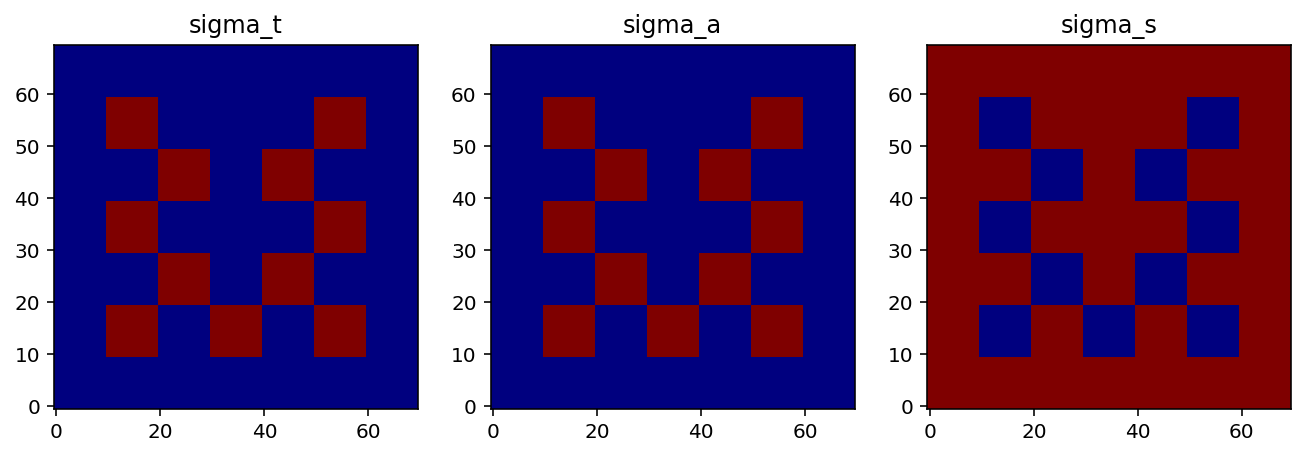

In [32]:
fig = plt.figure(figsize=(15, 15));
plt.subplot(141)
plt.title('sigma_t')
visualize_field("C:/projects/epfl/epfl17/python/sopn/pns_highrescheckerboard.mat", "sigma_t")
plt.subplot(142)
plt.title('sigma_a')
visualize_field("C:/projects/epfl/epfl17/python/sopn/pns_highrescheckerboard.mat", "sigma_a")
plt.subplot(143)
plt.title('sigma_s')
visualize_field("C:/projects/epfl/epfl17/python/sopn/pns_highrescheckerboard.mat", "sigma_s")
#plt.subplot(144)
#plt.title('q')
#visualize_field("C:/projects/epfl/epfl17/python/sopn/pnscheckerboard.mat", "q")
plt.show()

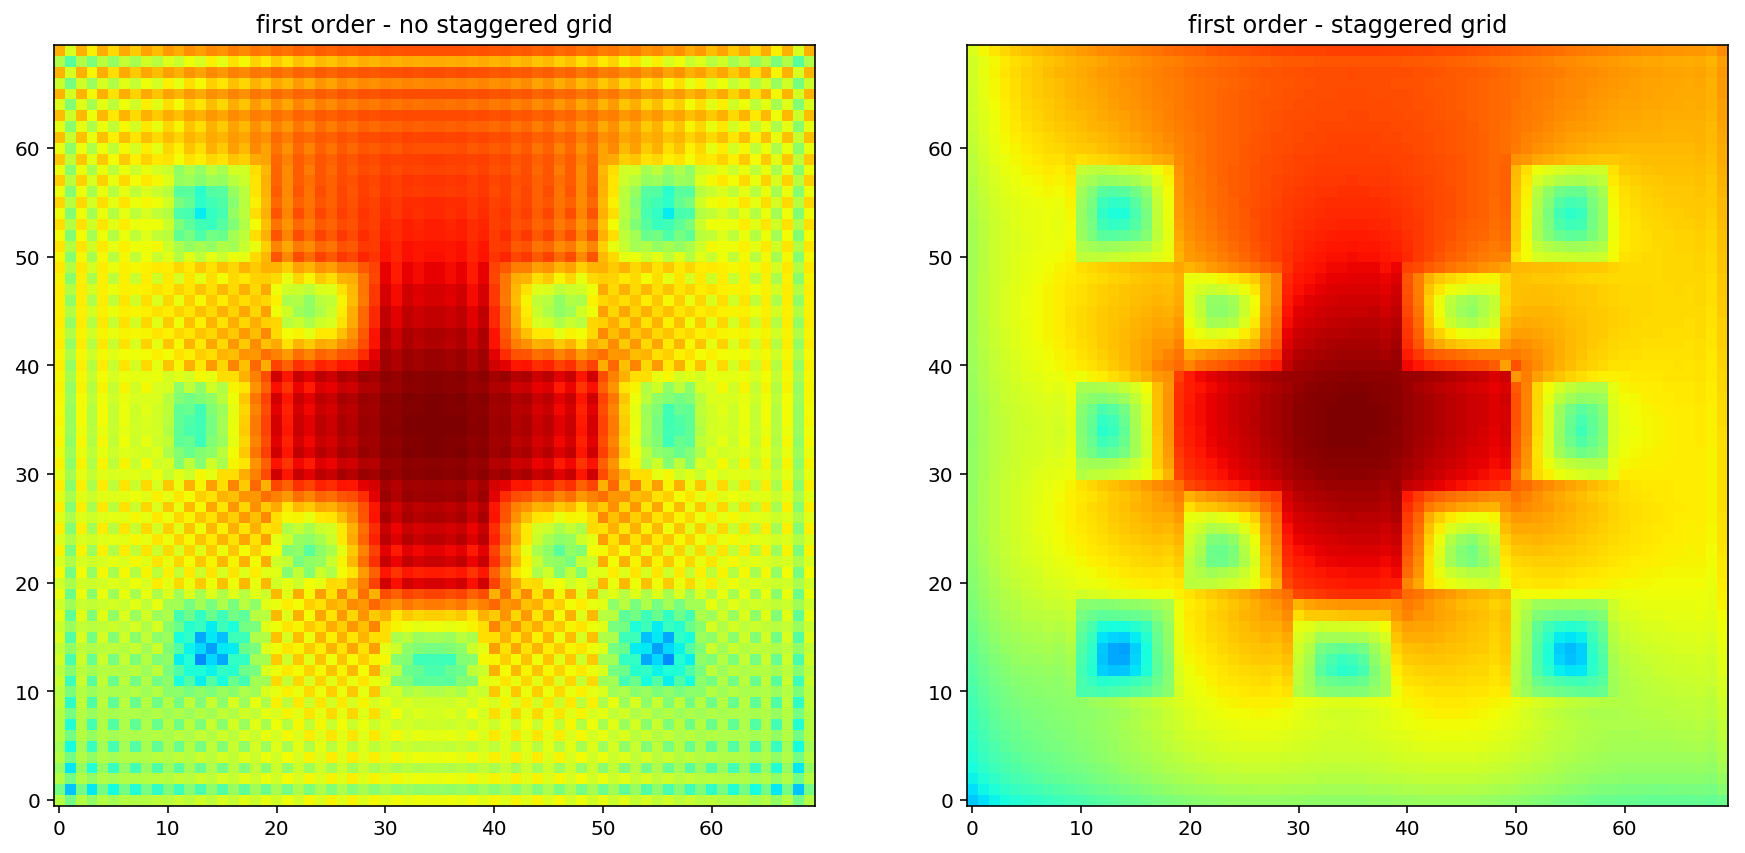

In [40]:
fig = plt.figure(figsize=(15, 15));
plt.subplot(121)
plt.title('first order - no staggered grid')
visualize_solution("C:/projects/epfl/epfl17/python/sopn/x_firstorder.mat")
plt.subplot(122)
plt.title('first order - staggered grid')
visualize_solution("C:/projects/epfl/epfl17/python/sopn/x_firstorder_staggered.mat")
plt.show();

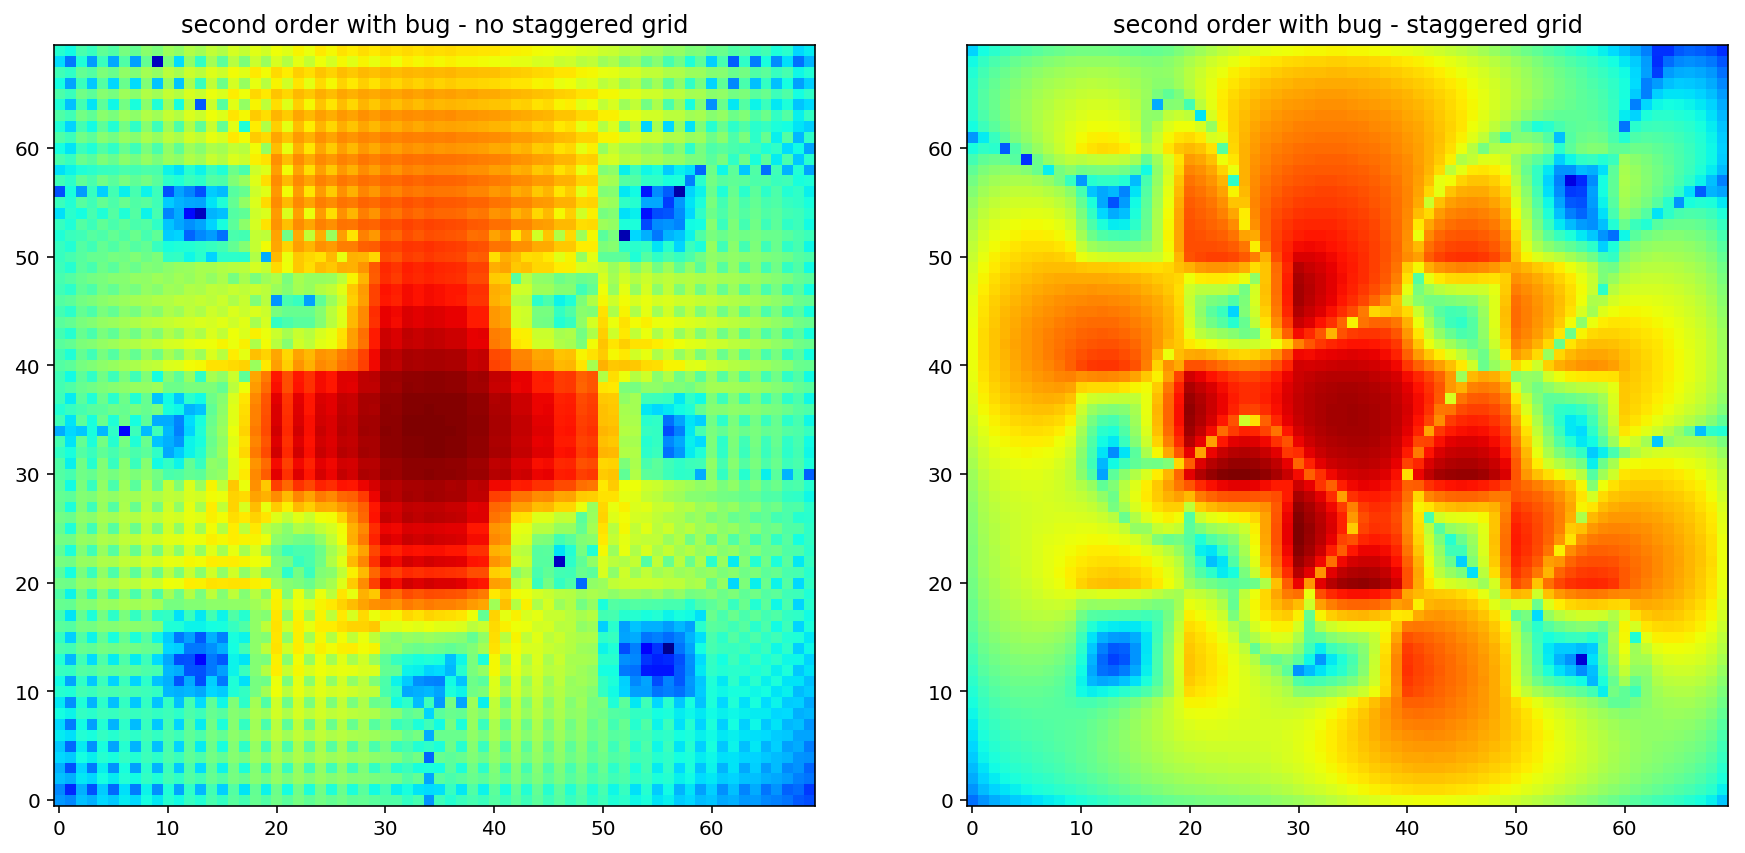

In [31]:
fig = plt.figure(figsize=(15, 15));
plt.subplot(121)
plt.title('second order with bug - no staggered grid')
visualize_solution("C:/projects/epfl/epfl17/python/sopn/x_lspn_bug.mat")
plt.subplot(122)
plt.title('second order with bug - staggered grid')
visualize_solution("C:/projects/epfl/epfl17/python/sopn/x_lspn_bug_staggered.mat")
plt.show();

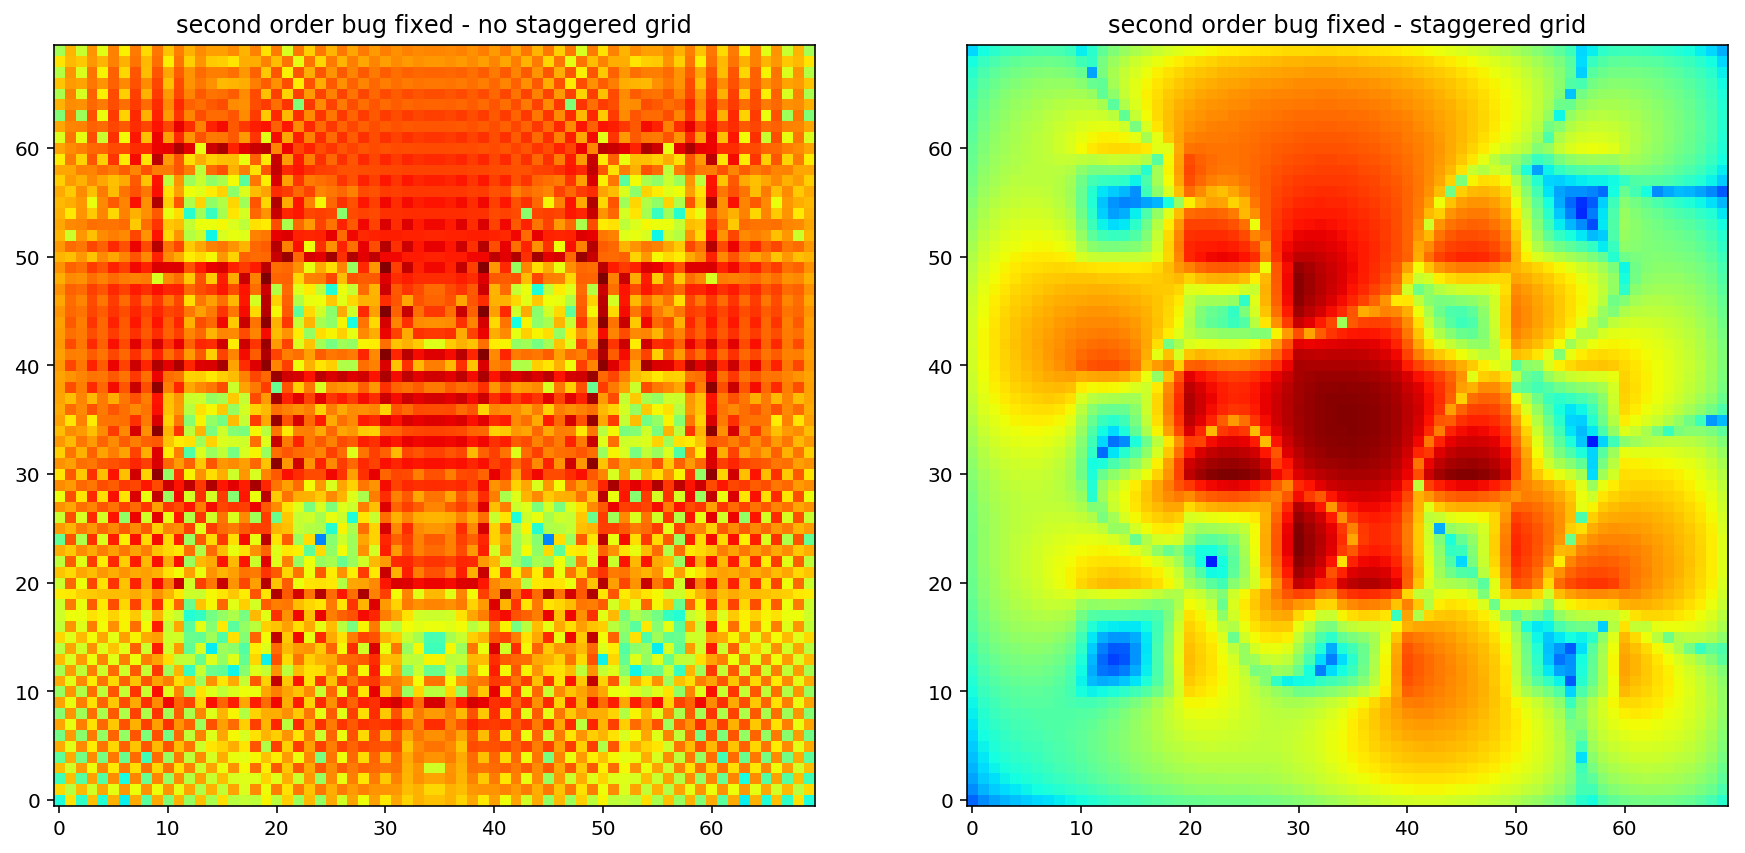

In [32]:
fig = plt.figure(figsize=(15, 15));
plt.subplot(121)
plt.title('second order bug fixed - no staggered grid')
visualize_solution("C:/projects/epfl/epfl17/python/sopn/x_lspn_corrected.mat")
plt.subplot(122)
plt.title('second order bug fixed - staggered grid')
visualize_solution("C:/projects/epfl/epfl17/python/sopn/x_lspn_corrected_staggered.mat")
plt.show();

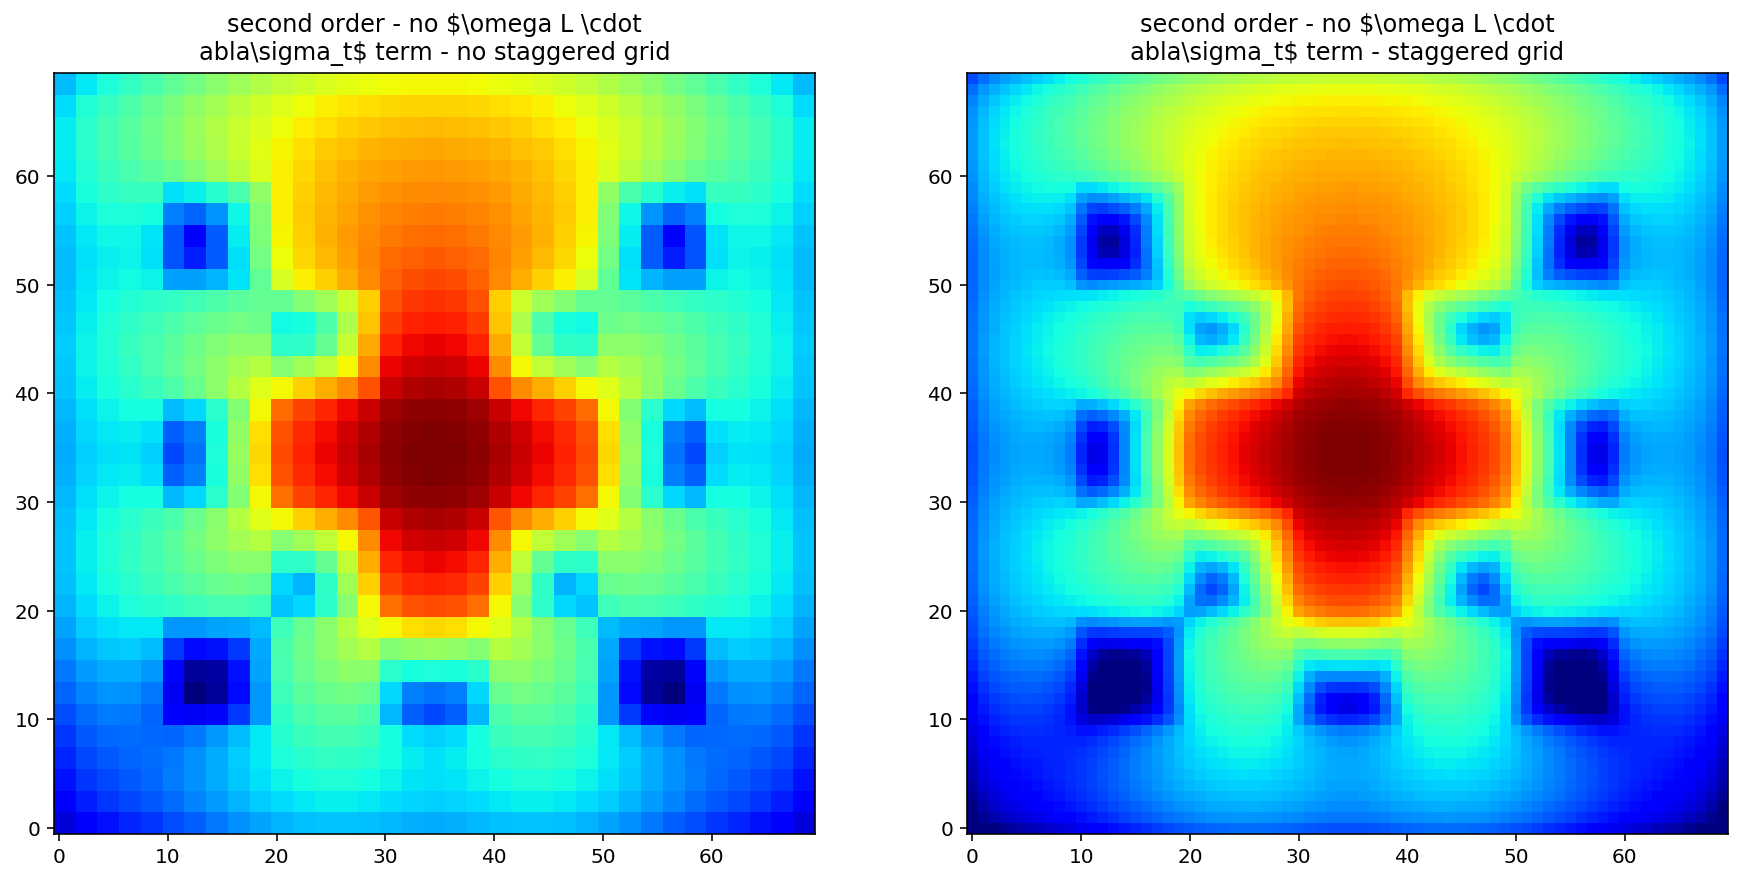

In [38]:
fig = plt.figure(figsize=(15, 15));
plt.subplot(121)
plt.title('second order - no $\omega L \cdot\nabla\sigma_t$ term - no staggered grid')
visualize_solution("C:/projects/epfl/epfl17/python/sopn/x_lspn_noddt.mat")
plt.subplot(122)
plt.title('second order - no $\omega L \cdot\nabla\sigma_t$ term - staggered grid')
visualize_solution("C:/projects/epfl/epfl17/python/sopn/x_lspn_noddt_staggered.mat")
plt.show();

In [ ]:
mat_data_test = scipy.io.loadmat("C:/projects/epfl/epfl17/python/sopn/data_lspn_test.mat")
mat_data_test_broken = scipy.io.loadmat("C:/projects/epfl/epfl17/python/sopn/data_lspn_test_broken.mat")
b = mat_data_test['b_new']
b_broken = mat_data_test_broken['b_new_broken']

A = mat_data_test['A_new']
A_broken = mat_data_test_broken['A_new_broken']

for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if A[i, j] != A_broken[i,j]:
            print("i={} j={} {} {}".format(i, j, A[i,j], A_broken[i,j]))


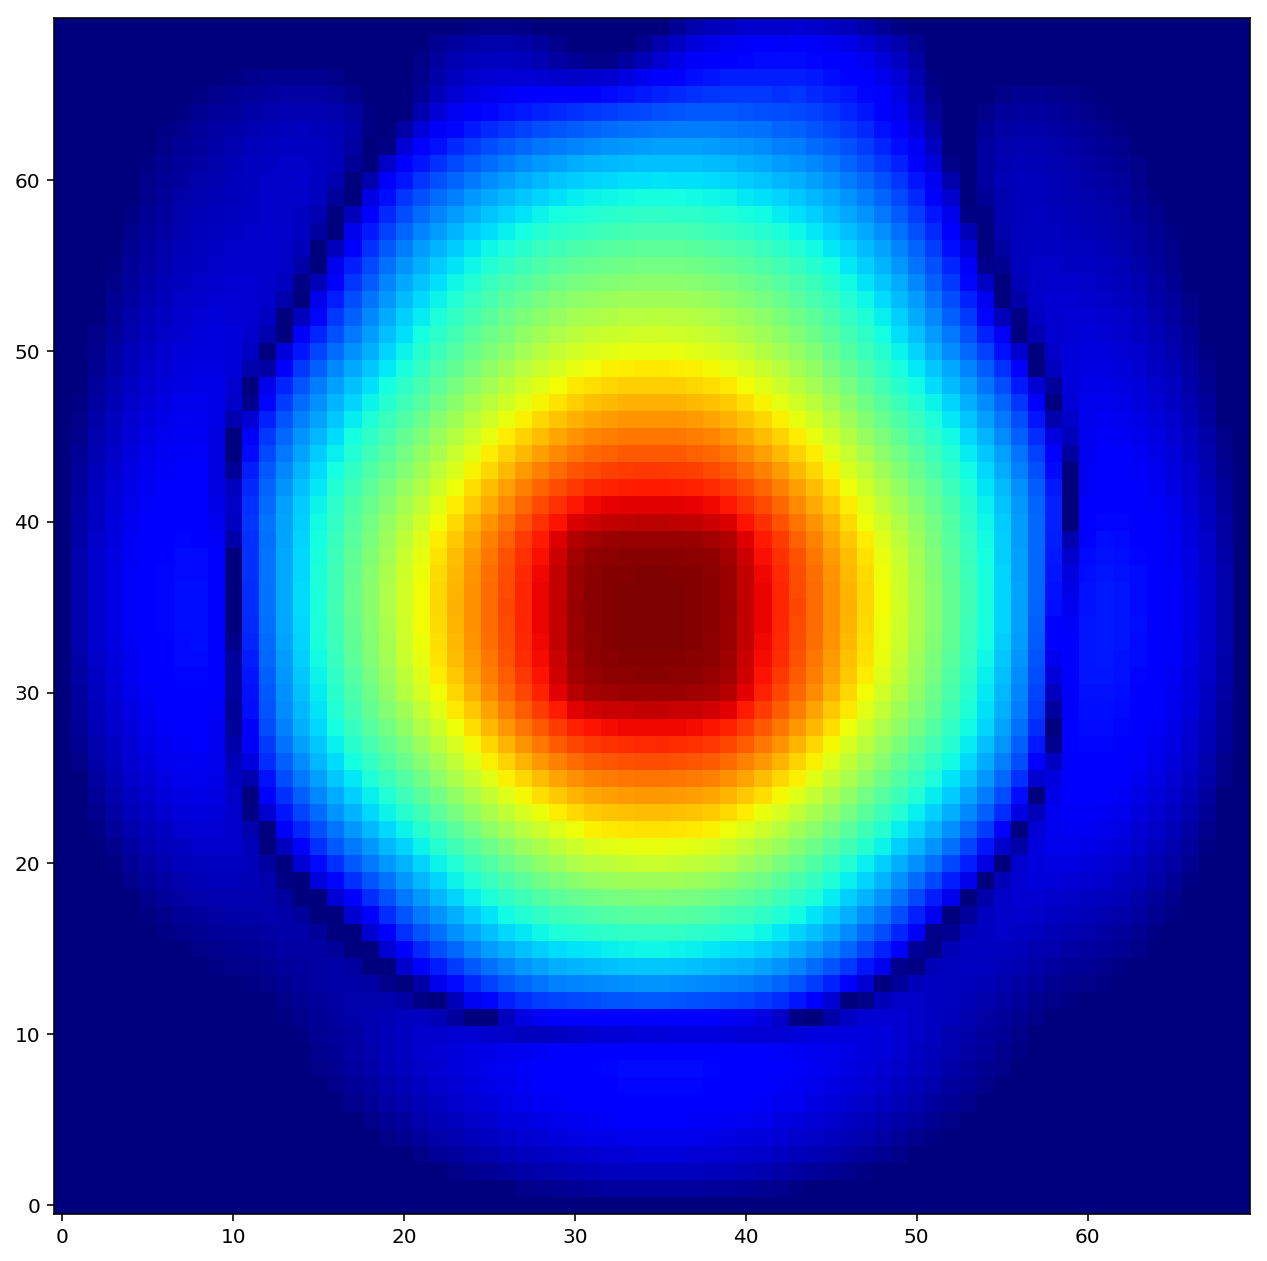

In [17]:
fig = plt.figure(figsize=(11, 11));
visualize_solution("C:/projects/epfl/epfl17/python/sopn/x_checkerboard2d_blur10.0.mat")
plt.show();

In [16]:
fig = plt.figure(figsize=(11, 11));
visualize_matrix_structure("C:/projects/epfl/epfl17/python/sopn/x_checkerboard2d_blur10.0.mat")
plt.show();

NameError: name 'visualize_matrix_structure' is not defined

In [6]:
0.223945249854*3.5449077

0.7938652405858685

In [4]:
def visualize_problem_and_solution( id ):
    problem_file = "C:/projects/epfl/epfl17/python/sopn/problem_{}.mat".format(id)
    fig = plt.figure(figsize=(15, 15));
    plt.subplot(141)
    plt.title('sigma_t')
    visualize_field(problem_file, "sigma_t")
    plt.subplot(142)
    plt.title('sigma_a')
    visualize_field(problem_file, "sigma_a")
    plt.subplot(143)
    plt.title('sigma_s')
    visualize_field(problem_file, "sigma_s")
    plt.subplot(144)
    plt.title('q')
    visualize_field(problem_file, "q")
    plt.show()
    
    fig = plt.figure(figsize=(6, 6));
    visualize_solution("C:/projects/epfl/epfl17/python/sopn/x_{}.mat".format(id))
    plt.show();
    


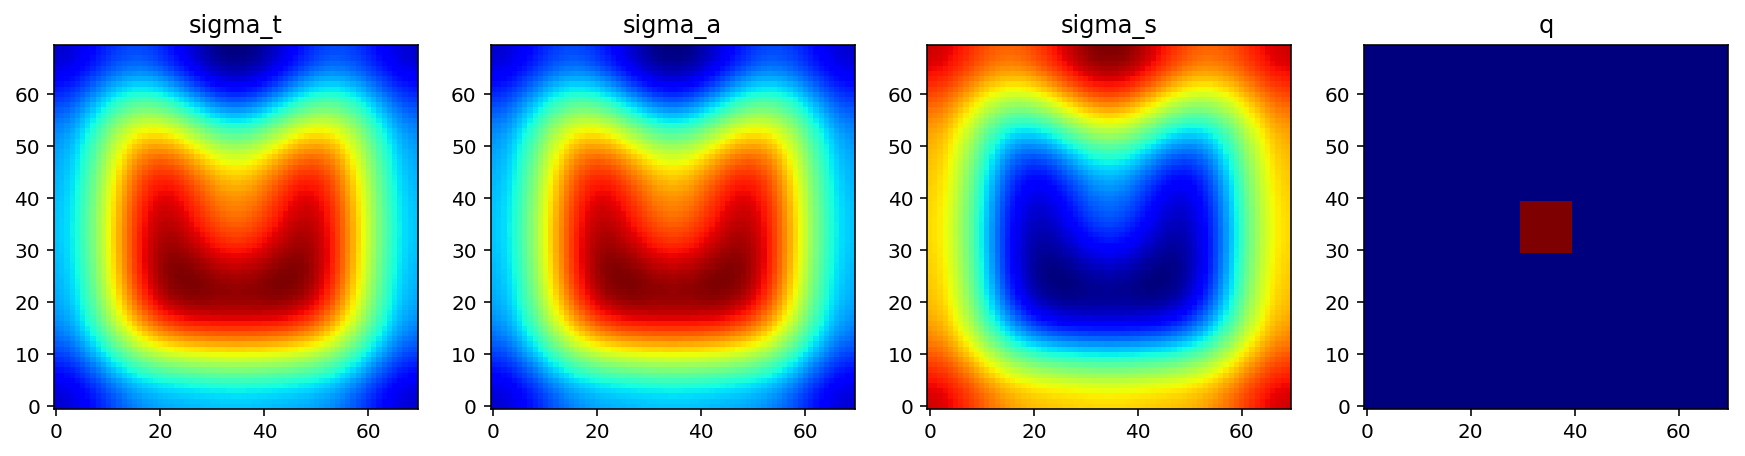

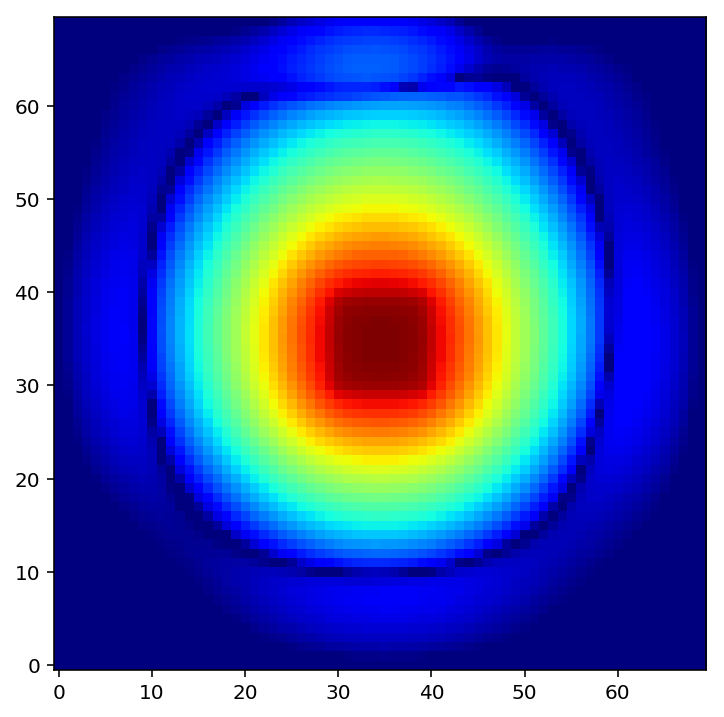

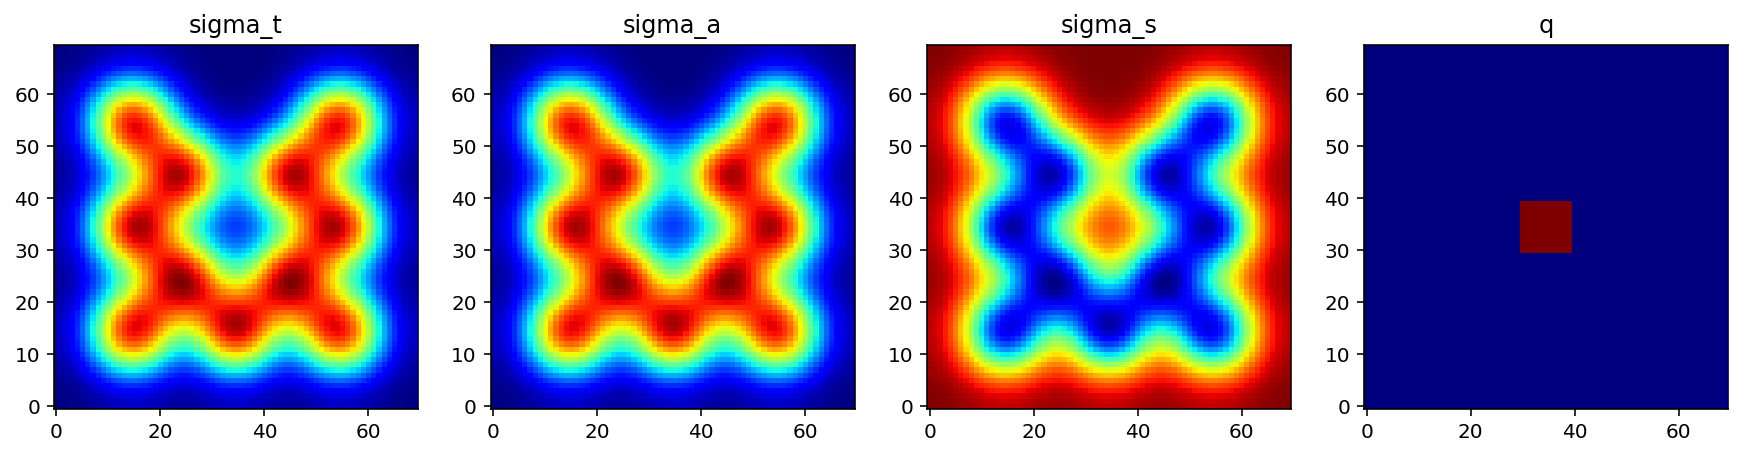

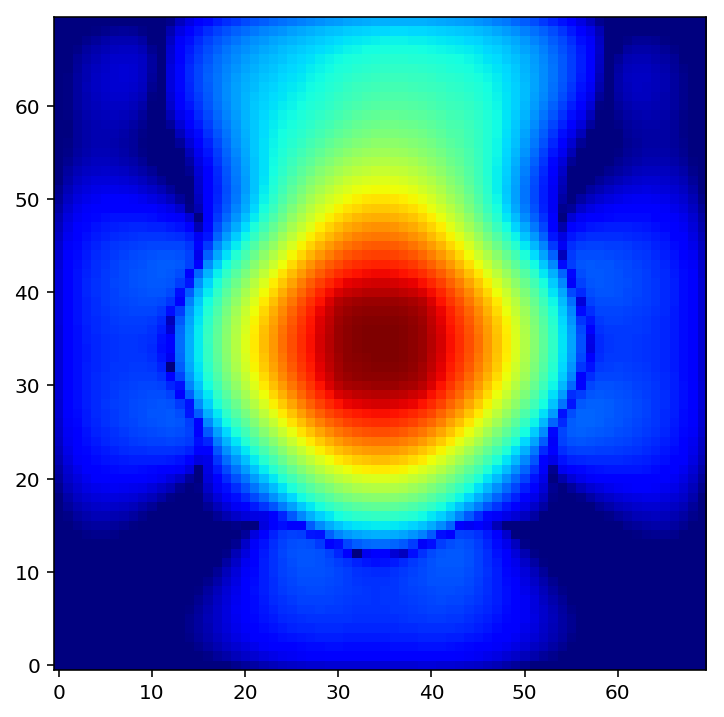

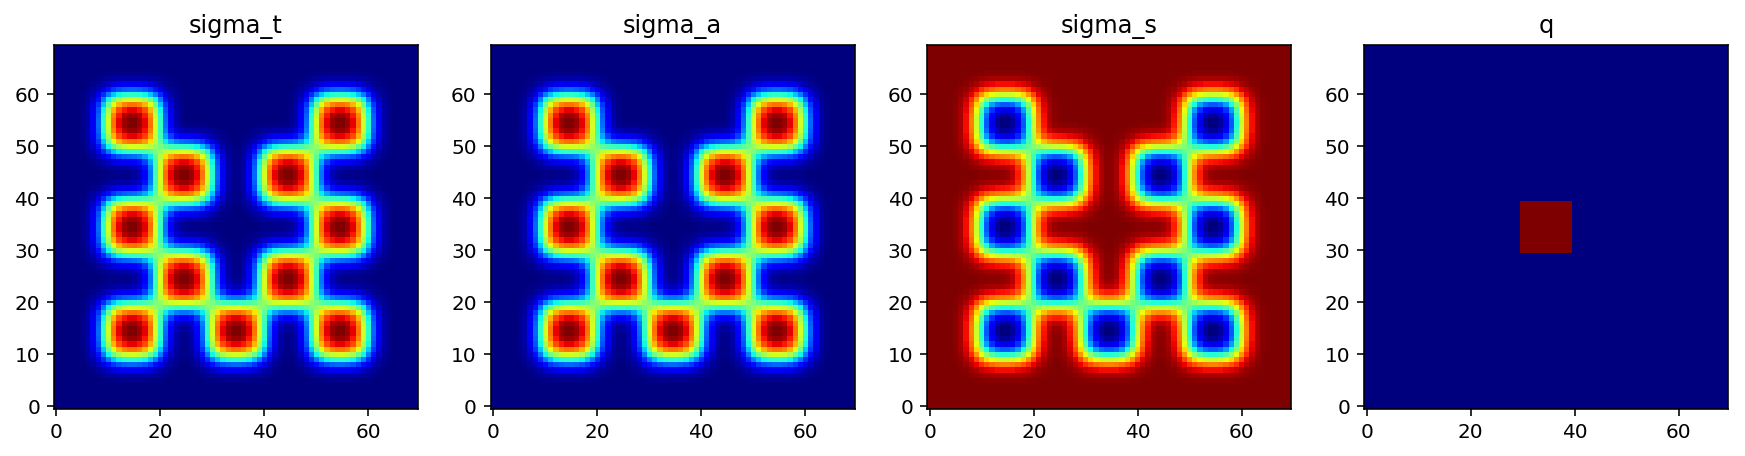

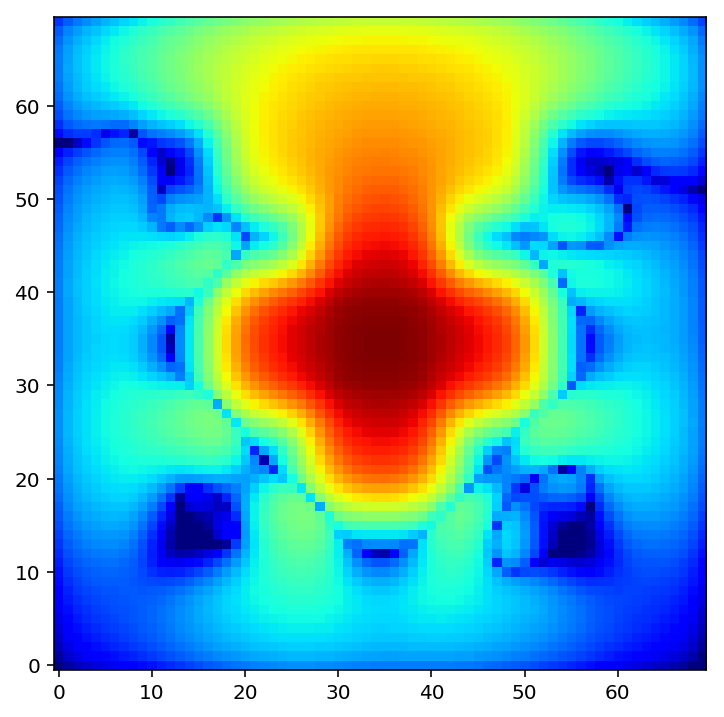

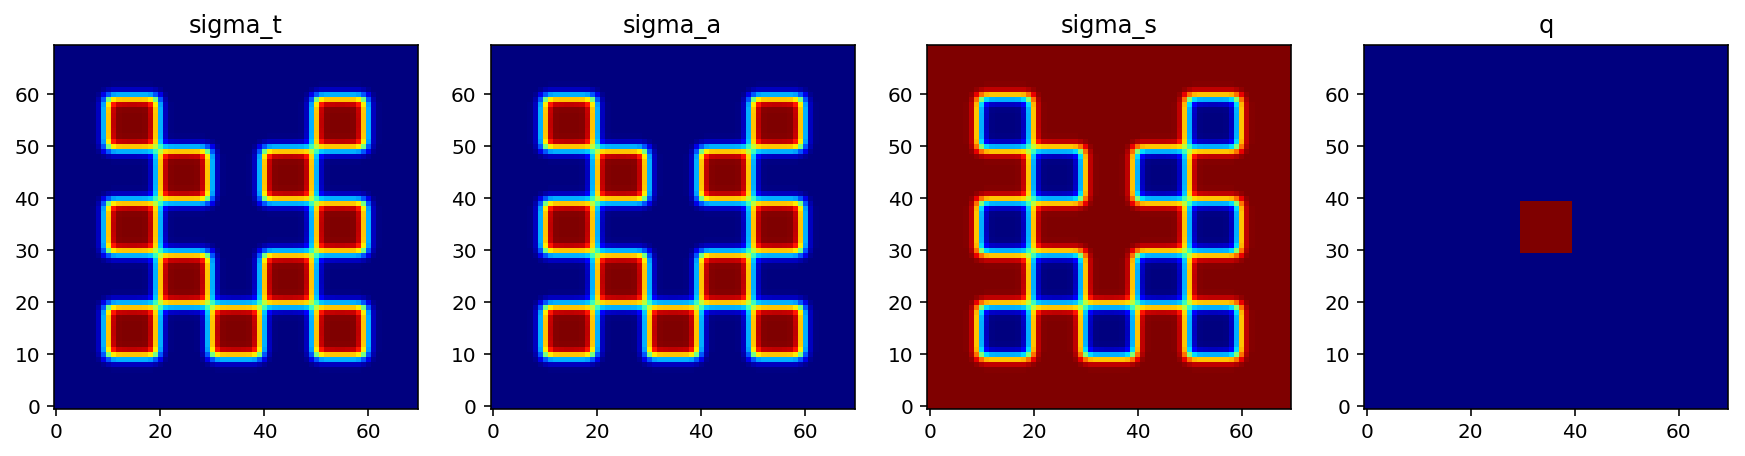

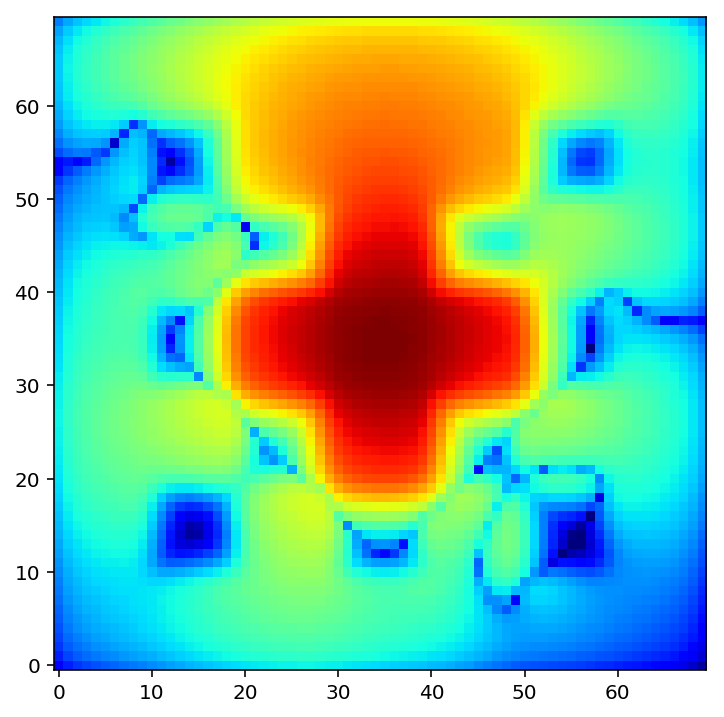

In [9]:
visualize_problem_and_solution("checkerboard2d_blur10.0")
visualize_problem_and_solution("checkerboard2d_blur5.0")
visualize_problem_and_solution("checkerboard2d_blur2.0")
visualize_problem_and_solution("checkerboard2d_blur1.0")

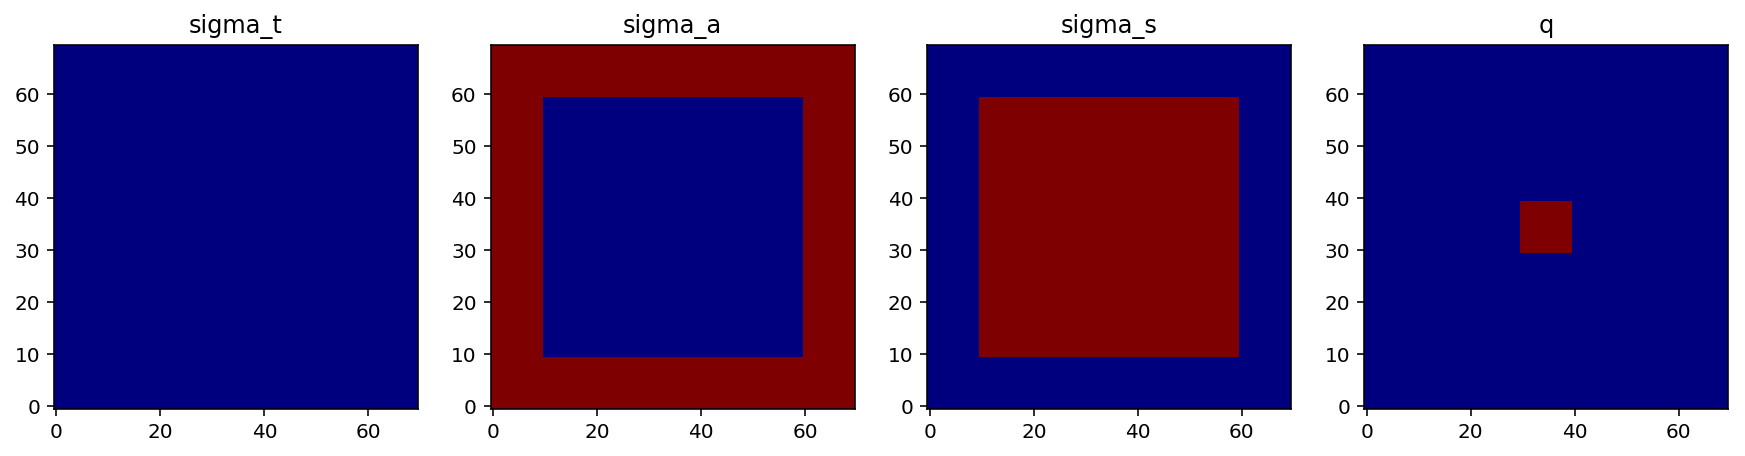

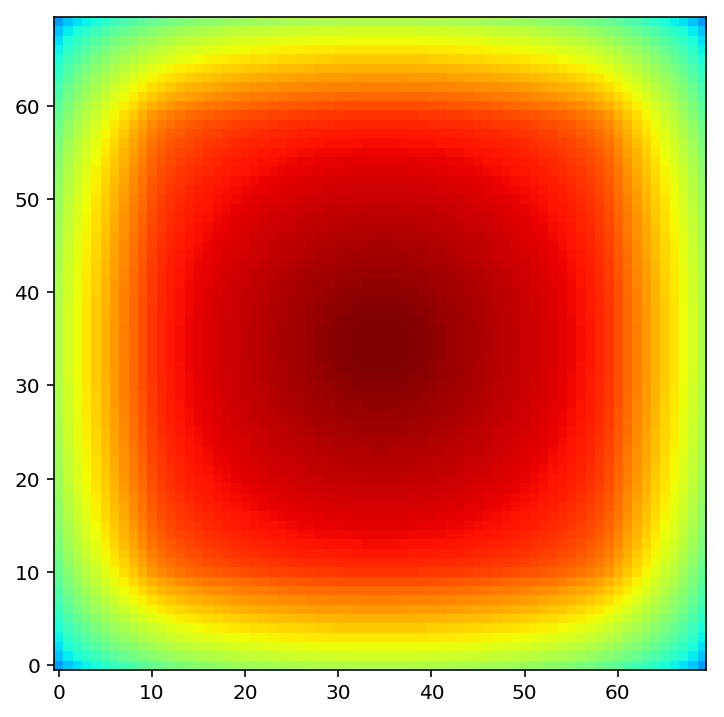

In [12]:
visualize_problem_and_solution("blob2d")

C:\Users\dk402_000\Anaconda3\lib\site-packages\scipy\io\matlab\mio.py:136: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


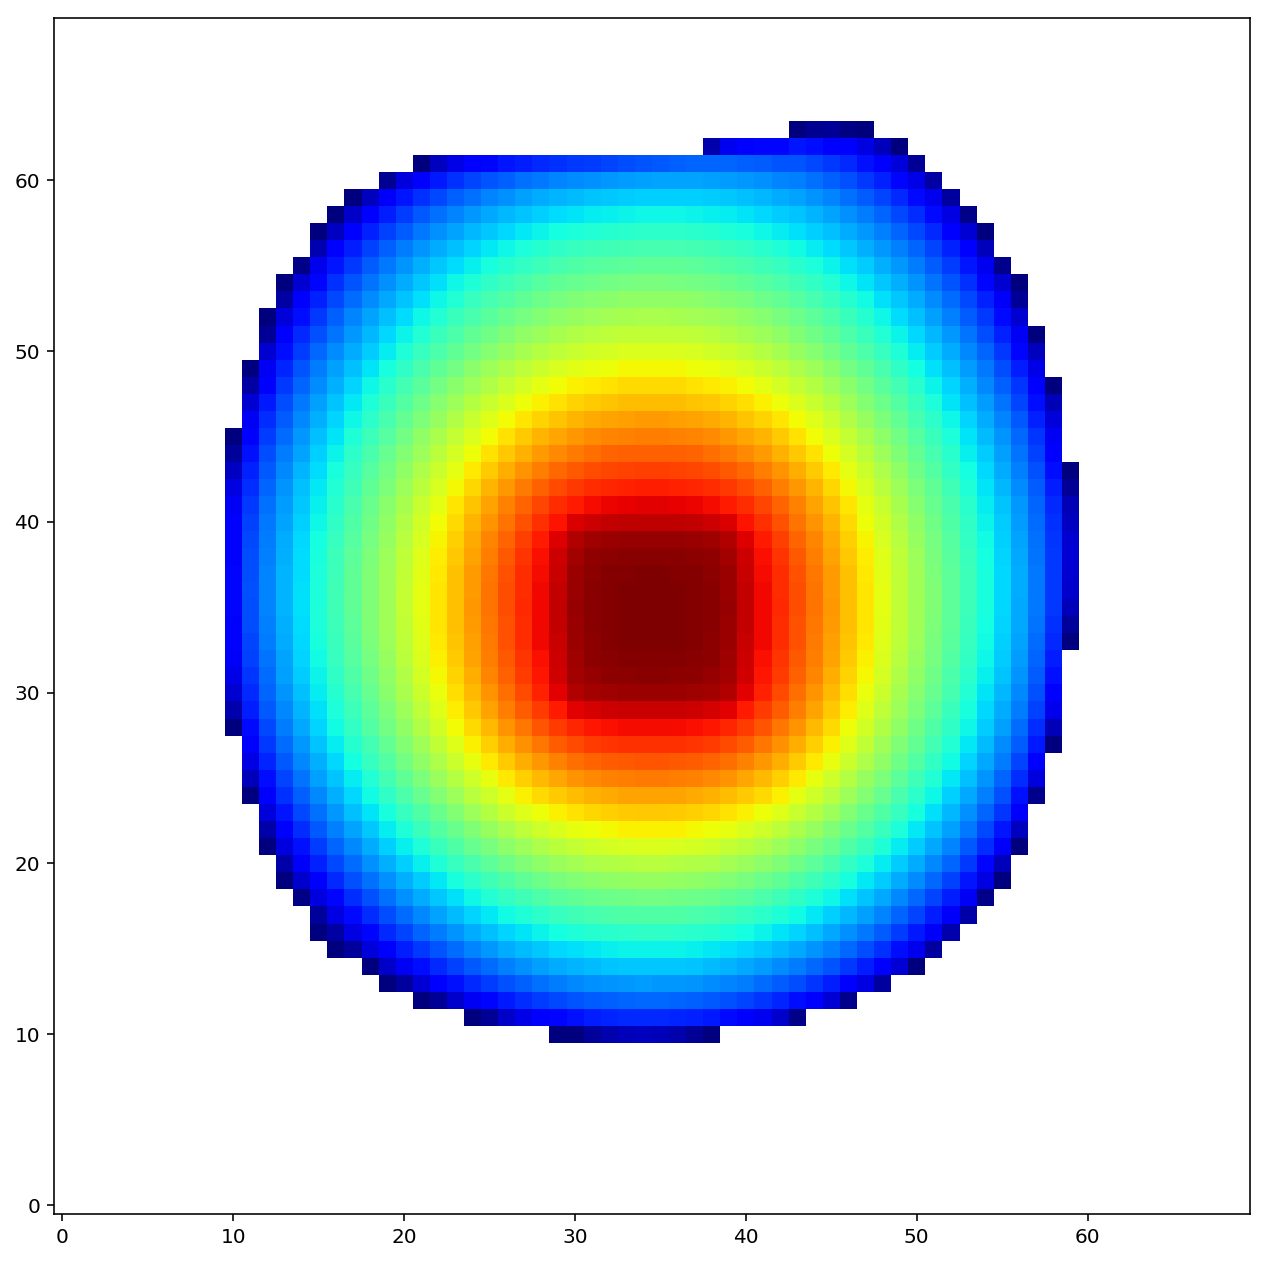

In [23]:

fig = plt.figure(figsize=(11, 11));
visualize_solution("C:/projects/epfl/epfl17/python/sopn/solution_checkerboard_blur10.0_term1.mat")
plt.show()

--------------------------------------------

In [3]:
def visualize_solution_vector( x, pnb ):

    u0 = np.zeros( (pnb.domain.res_x, pnb.domain.res_y) )

    for voxel_i in range(pnb.domain.res_y):
        for voxel_j in range(pnb.domain.res_x):
            i = pnb.get_global_index(voxel_i, voxel_j, 0)
            value = x[i]
            u0[voxel_i, voxel_j] = value

    u0 = np.abs(u0)

    vmin = 1.0e-8
    vmax = np.max(u0)*1.0
    
    if vmin >= vmax:
        vmin = vmax
    print("vmin={} vmax={}".format(vmin, vmax))

    if vmin==vmax:
        plt.imshow(u0.T, interpolation="nearest", cmap='jet', vmin=vmin, vmax=vmax, origin='lower')
    else:
        plt.imshow(u0.T, interpolation="nearest", cmap='jet', norm=LogNorm(vmin=vmin, vmax=vmax), origin='lower')
    



In [10]:
def visualize_problem( data ):
    fig = plt.figure(figsize=(15, 15));
    plt.subplot(141)
    plt.title('sigma_t')
    field = data["sigma_t"].T
    plt.imshow(field, interpolation="nearest", cmap='jet', origin='lower', vmin=np.min(field), vmax=np.max(field))
    plt.subplot(142)
    plt.title('sigma_a')
    field = data["sigma_a"].T
    plt.imshow(field, interpolation="nearest", cmap='jet', origin='lower', vmin=np.min(field), vmax=np.max(field))
    plt.subplot(143)
    plt.title('sigma_s')
    field = data["sigma_s"].T
    plt.imshow(field, interpolation="nearest", cmap='jet', origin='lower', vmin=np.min(field), vmax=np.max(field))
    #plt.subplot(144)
    #plt.title('q')
    #visualize_field(problem_file, "q")
    plt.show()
    
    #fig = plt.figure(figsize=(6, 6));
    #visualize_solution("C:/projects/epfl/epfl17/python/sopn/x_{}.mat".format(id))
    #plt.show();

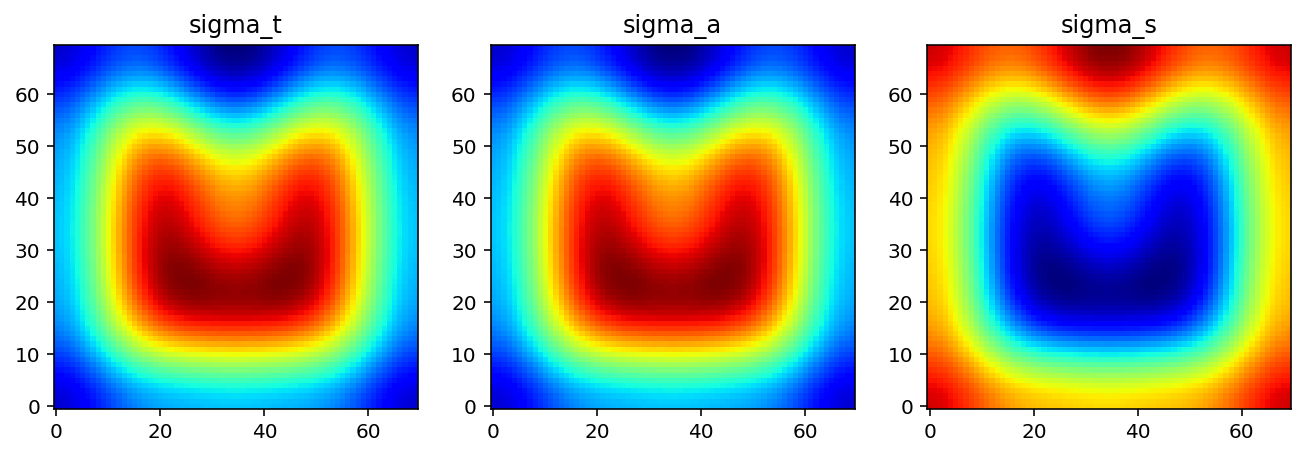

In [11]:
id = "checkerboard_blur10.0"
visualize_problem(data)

loading PN solution from C:/projects/epfl/epfl17/python/sopn/solution2_checkerboard.mat


C:\Users\dk402_000\Anaconda3\lib\site-packages\scipy\io\matlab\mio.py:136: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


vmin=1e-08 vmax=0.5133317779927647


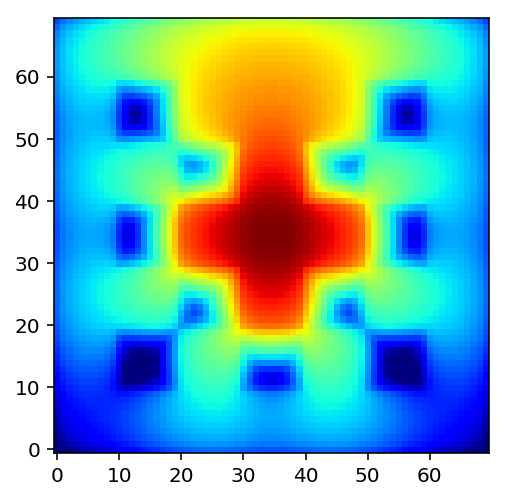

In [6]:
id = "checkerboard"
data = lspn.load_pn_solution("C:/projects/epfl/epfl17/python/sopn/solution_{}.mat".format(id))

A_real = data["A_real"]
x_real = data["x_real"]
b_real = data["b_real"]
pnb = data["pnb"]

visualize_solution_vector( x_real, pnb )

In [41]:
def get_global_index(voxel_i, voxel_j, coeff):
    #res_x = 70
    #res_y = 70
    res_x = 200
    res_y = 200
    numCoeffs = 3
    voxel = voxel_j*res_x + voxel_i
    return voxel*numCoeffs + coeff

def visualize_solution_vector2( x ):
    res_x = 70
    res_y = 70

    u0 = np.zeros( (res_x, res_y) )

    for voxel_i in range(res_y):
        for voxel_j in range(res_x):
            i = get_global_index(voxel_i, voxel_j, 0)
            value = x[i, 0]
            u0[voxel_i, voxel_j] = value

    u0 = np.abs(u0)

    vmin = 1.0e-8
    vmax = np.max(u0)*1.0
    
    if vmin >= vmax:
        vmin = vmax
    print("vmin={} vmax={}".format(vmin, vmax))

    if vmin==vmax:
        plt.imshow(u0.T, interpolation="nearest", cmap='jet', vmin=vmin, vmax=vmax, origin='lower')
    else:
        plt.imshow(u0.T, interpolation="nearest", cmap='jet', norm=LogNorm(vmin=vmin, vmax=vmax), origin='lower')
    



C:\Users\dk402_000\Anaconda3\lib\site-packages\scipy\io\matlab\mio.py:136: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


vmin=1e-08 vmax=4.632232898630535e-05


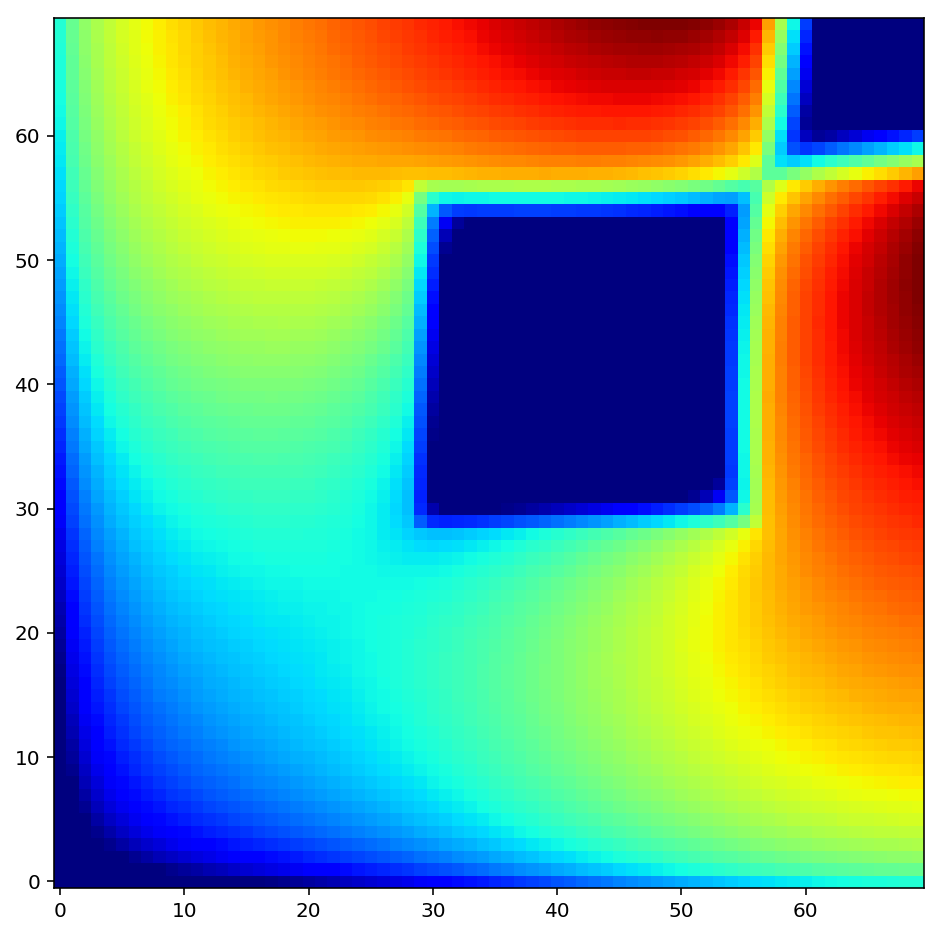

In [42]:
id = "checkerboard"
filename = "C:/projects/epfl/epfl17/python/sopn/pns_highres_solution{}.mat".format(id)
data = scipy.io.loadmat(filename)
x = data["x"]
fig = plt.figure(figsize=(8, 8));
visualize_solution_vector2( x )
plt.show()

In [20]:
filename = "C:/projects/epfl/epfl17/python/sopn/system2_solution{}.mat".format(id)
data = scipy.io.loadmat(filename)
x = data["x"]


C:\Users\dk402_000\Anaconda3\lib\site-packages\scipy\io\matlab\mio.py:136: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


vmin=1e-08 vmax=0.5060757493113324


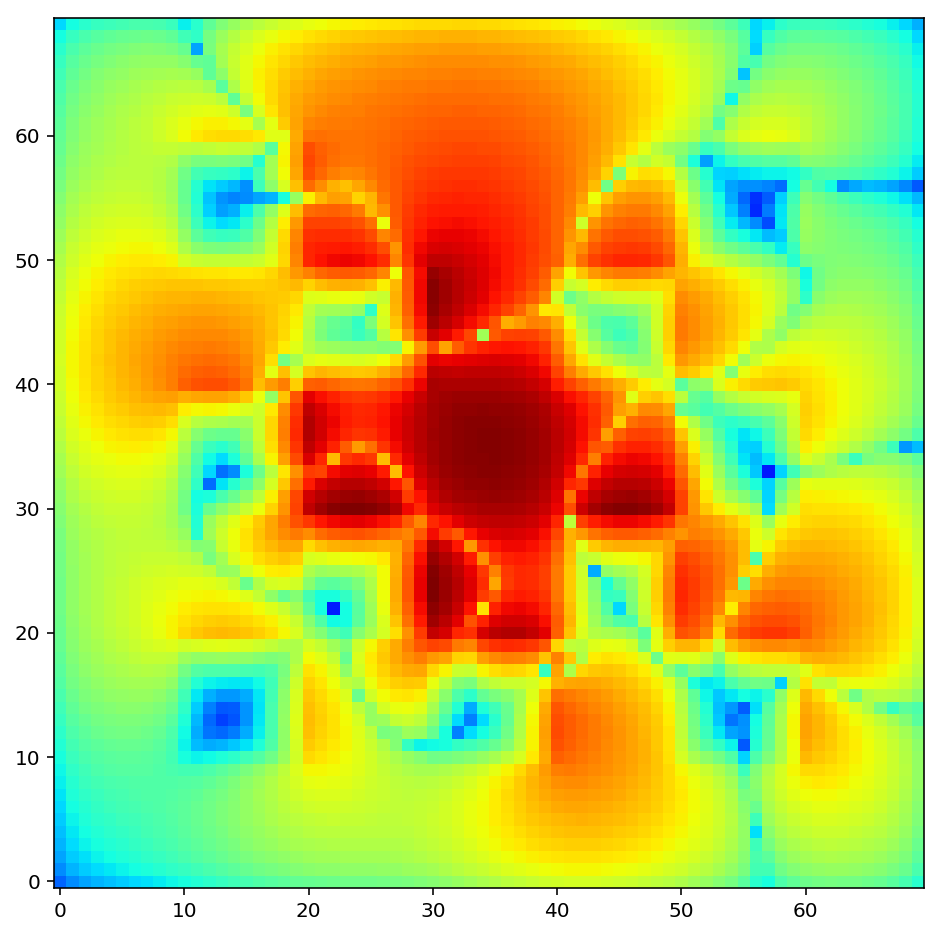

In [28]:
fig = plt.figure(figsize=(8, 8));
visualize_solution_vector2( x )
plt.show()